# Q.1: Write Steps Involved in PCA. 

As the number of features or dimensions in a dataset increases, the amount of data required to obtain a statistically significant result increases exponentially. This can lead to issues such as overfitting, increased computation time, and reduced accuracy of machine learning models this is known as the curse of dimensionality problems that arise while working with high-dimensional data.

As the number of dimensions increases, the number of possible combinations of features increases exponentially, which makes it computationally difficult to obtain a representative sample of the data and it becomes expensive to perform tasks such as clustering or classification because it becomes. Additionally, some machine learning algorithms can be sensitive to the number of dimensions, requiring more data to achieve the same level of accuracy as lower-dimensional data.

To address the curse of dimensionality, Feature engineering techniques are used which include feature selection and feature extraction. Dimensionality reduction is a type of feature extraction technique that aims to reduce the number of input features while retaining as much of the original information as possible.



PCA:

Principal Component Analysis(PCA) technique was introduced by the mathematician Karl Pearson in 1901. It works on the condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum. 

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models. Moreover, 
Principal Component Analysis (PCA) is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit. 
The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables. 



Steps:

1. Standardization:
Begin by standardizing your dataset. This ensures that each variable has a mean of 0 and a standard deviation of 1. The formula for standardization is: [ z = \frac{{x - \mu}}{{\sigma}} ] where (x) represents the original value, (\mu) is the mean of independent features, and (\sigma) is the standard deviation of independent features.


2. Covariance Matrix Computation:
Calculate the covariance matrix for the features in your dataset. The covariance between two variables (X) and (Y) is given by: [ \text{{cov}}(X, Y) = \frac{{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}}{{n-1}} ] where (\bar{X}) and (\bar{Y}) are the means of (X) and (Y), respectively.


3. Eigenvalues and Eigenvectors:
Compute the eigenvalues and eigenvectors of the covariance matrix. These represent the directions (principal components) along which the data varies the most.
The eigenvalues indicate the amount of variance explained by each principal component.


4. Sort Eigenvalues and Eigenvectors:
Sort the eigenvalues in descending order. The corresponding eigenvectors will follow the same order.
Select the top (k) eigenvalues (where (k) is the desired reduced dimensionality).


5. Form a Matrix of Eigenvectors:
Create a matrix using the top (k) eigenvectors as columns. This matrix will serve as the transformation matrix to project your data onto the new subspace.



By following these steps, PCA helps you reduce the dimensionality of your dataset while retaining the most important patterns or relationships between variables. It’s a valuable tool for exploratory data analysis and machine learning modeling. 

# Q.2: Perform dimensionality reduction using PCA on the US Arrests dataset (enclosed herewith). What variance can be explained by PC1 & PC2?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('USArrests.csv')

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.info

<bound method DataFrame.info of         Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      

In [8]:
df.shape

(50, 5)

## Naming Unnamed Column 

In [14]:
df = df.rename(columns={'Unnamed: 0':'State'})
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [29]:
df.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [30]:
df['State'].value_counts().sort_values()

State
Alabama           1
Mississippi       1
Arizona           1
Arkansas          1
California        1
Colorado          1
Connecticut       1
Delaware          1
Florida           1
Georgia           1
Hawaii            1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Kentucky          1
Louisiana         1
Maine             1
Maryland          1
Massachusetts     1
Michigan          1
Missouri          1
Montana           1
Nebraska          1
Wisconsin         1
Pennsylvania      1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Minnesota         1
Oregon            1
Alaska            1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             1
Utah              1
Vermont           1
Virginia          1
Washington        1
West Virginia     1
Rhode Island      1
Wyoming       

In [31]:
print(f"Total Number of States:\t{df.shape[0]}")

Total Number of States:	50


In [16]:
df['Murder'].value_counts().sort_values()

Murder
4.0     1
11.4    1
2.7     1
12.2    1
4.3     1
8.1     1
8.8     1
7.9     1
3.3     1
5.7     1
5.9     1
5.3     1
10.4    1
7.2     1
9.7     1
11.3    1
4.4     1
12.1    1
10.0    1
17.4    1
16.1    1
6.8     1
3.2     1
11.1    1
13.0    1
8.5     1
7.3     1
6.6     1
4.9     1
0.8     1
6.3     1
7.4     1
14.4    1
3.8     1
12.7    1
3.4     1
6.0     2
2.6     2
2.1     2
15.4    2
9.0     2
2.2     2
13.2    2
Name: count, dtype: int64

In [17]:
df['Assault'].value_counts().sort_values()

Assault
53     1
259    1
178    1
263    1
294    1
190    1
276    1
204    1
110    1
238    1
335    1
211    1
46     1
113    1
56     1
115    1
83     1
300    1
149    1
255    1
252    1
72     1
161    1
145    1
174    1
57     1
285    1
254    1
337    1
45     1
81     1
106    1
151    1
102    1
279    1
86     1
188    1
201    1
48     1
156    1
236    1
109    2
159    2
249    2
120    3
Name: count, dtype: int64

In [18]:
df['UrbanPop'].value_counts().sort_values()

UrbanPop
59    1
73    1
56    1
74    1
62    1
53    1
85    1
63    1
51    1
57    1
65    1
54    1
77    1
78    1
91    1
52    1
32    1
39    1
87    1
81    1
75    1
68    1
86    1
89    1
58    1
50    1
70    2
44    2
48    2
67    2
60    2
83    2
45    2
72    2
80    4
66    4
Name: count, dtype: int64

In [19]:
df['Rape'].value_counts().sort_values()

Rape
10.8    1
44.5    1
28.2    1
31.0    1
19.5    1
40.6    1
38.7    1
11.1    1
15.8    1
31.9    1
16.4    1
25.8    1
14.2    1
24.0    1
21.0    1
11.3    1
18.0    1
22.2    1
7.8     1
27.8    1
35.1    1
20.2    1
46.0    1
15.6    1
9.3     1
21.2    1
29.3    1
9.5     1
18.8    1
32.1    1
26.1    1
16.1    1
7.3     1
21.4    1
17.1    1
20.0    1
16.5    1
22.5    1
12.8    1
26.9    1
25.5    1
22.9    1
11.2    1
20.7    1
26.2    1
8.3     1
16.3    2
14.9    2
Name: count, dtype: int64

# Checking Missing Values

In [20]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])
missing_values

,Missing Values
State,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [24]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## Data Visualization 

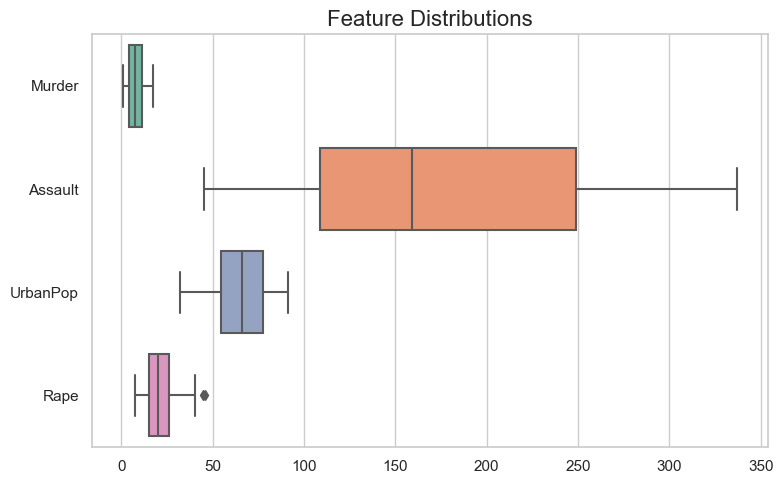

In [33]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Feature Distributions", size=16)
plt.tight_layout()
plt.show()

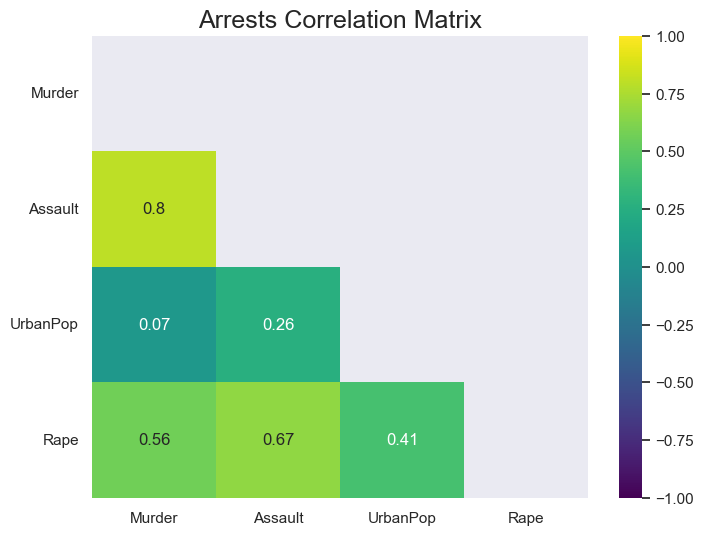

In [38]:
sns.set_theme(style="dark")
plt.figure(figsize=(8, 6))
corr_df = df.drop(["State"], axis=1).corr(numeric_only=True)
mask_ut = np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="viridis", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0)
plt.title("Arrests Correlation Matrix", size=18)
plt.show()

## Data Scaling & PCA Model

In [41]:
X = df.drop(["State"], axis=1).values

In [42]:
X = StandardScaler().fit_transform(X)

In [43]:
pca = PCA()

In [53]:
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3", "PC4"])
df_pca.head()

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


In [49]:
std = df_pca.describe().transpose()["std"]
for i in range(2):
    print(f"Standard Deviation of PC{i+1}:\t{std[i]:.2f}")

Standard Deviation of PC1:	1.59
Standard Deviation of PC2:	1.00


df_pca.describe(): 
This generates descriptive statistics of the DataFrame df_pca. It includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

transpose(): 
This method transposes rows and columns in the DataFrame, effectively swapping rows with columns.

["std"]: 
This selects the row corresponding to the standard deviation (std) from the transposed DataFrame.

In [48]:
for i in range(2):
    var = pca.explained_variance_ratio_[i]
    print(f"Variance Explained by PC{i+1}:\t{var:.4f}")

Variance Explained by PC1:	0.6201
Variance Explained by PC2:	0.2474


## Scree Plot 

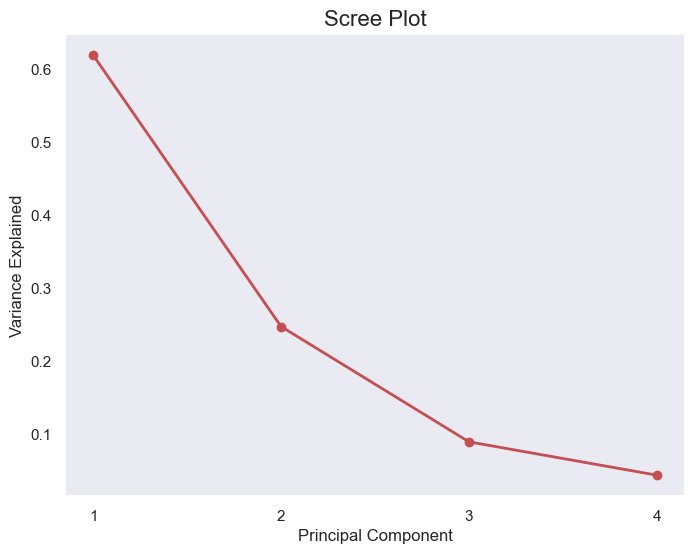

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, "ro-", linewidth=2)
plt.title("Scree Plot", size=16)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.xticks(range(4), [i+1 for i in range(4)])
plt.show()

# Q.3: Why Dimension Reduction is an Important Concept in Data Science?

Dimensionality Reduction:

Dimensionality reduction is a technique used to reduce the number of features in a dataset while retaining as much of the important information as possible. In other words, it is a process of transforming high-dimensional data into a lower-dimensional space that still preserves the essence of the original data.

In machine learning, high-dimensional data refers to data with a large number of features or variables. The curse of dimensionality is a common problem in machine learning, where the performance of the model deteriorates as the number of features increases. This is because the complexity of the model increases with the number of features, and it becomes more difficult to find a good solution. In addition, high-dimensional data can also lead to overfitting, where the model fits the training data too closely and does not generalize well to new data.

Dimensionality reduction can help to mitigate these problems by reducing the complexity of the model and improving its generalization performance. There are two main approaches to dimensionality reduction: feature selection and feature extraction.

Feature Selection:
Feature selection involves selecting a subset of the original features that are most relevant to the problem at hand. The goal is to reduce the dimensionality of the dataset while retaining the most important features. There are several methods for feature selection, including filter methods, wrapper methods, and embedded methods. Filter methods rank the features based on their relevance to the target variable, wrapper methods use the model performance as the criteria for selecting features, and embedded methods combine feature selection with the model training process.

Feature Extraction:
Feature extraction involves creating new features by combining or transforming the original features. The goal is to create a set of features that captures the essence of the original data in a lower-dimensional space. There are several methods for feature extraction, including principal component analysis (PCA), linear discriminant analysis (LDA), and t-distributed stochastic neighbor embedding (t-SNE). PCA is a popular technique that projects the original features onto a lower-dimensional space while preserving as much of the variance as possible.





Importance in DATA Science:

An intuitive example of dimensionality reduction can be discussed through a simple e-mail classification problem, where we need to classify whether the e-mail is spam or not. This can involve a large number of features, such as whether or not the e-mail has a generic title, the content of the e-mail, whether the e-mail uses a template, etc. However, some of these features may overlap. In another condition, a classification problem that relies on both humidity and rainfall can be collapsed into just one underlying feature, since both of the aforementioned are correlated to a high degree. Hence, we can reduce the number of features in such problems. A 3-D classification problem can be hard to visualize, whereas a 2-D one can be mapped to a simple 2-dimensional space, and a 1-D problem to a simple line.

There are two components of dimensionality reduction:

Feature selection: In this, we try to find a subset of the original set of variables, or features, to get a smaller subset which can be used to model the problem. It usually involves three ways:
1. Filter
2. Wrapper
3. Embedded


Feature extraction: This reduces the data in a high dimensional space to a lower dimension space, i.e. a space with lesser no. of dimensions.



Methods of Dimensionality Reduction
The various methods used for dimensionality reduction include:

1. Principal Component Analysis (PCA)
2. Linear Discriminant Analysis (LDA)
3. Generalized Discriminant Analysis (GDA)




Dimensionality reduction may be both linear and non-linear, depending upon the method used. The prime linear method, called Principal Component Analysis, or PCA, is discussed below.

This method was introduced by Karl Pearson. It works on the condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum.

It involves the following steps:
1. Construct the covariance matrix of the data.
2. Compute the eigenvectors of this matrix.
3. Eigenvectors corresponding to the largest eigenvalues are used to reconstruct a large fraction of variance of the original data.



In a nutshell:

Dimensionality reduction is a crucial concept in data science for several compelling reasons:

Complexity Reduction:
As datasets grow in size and dimensionality, the complexity of models increases. This can lead to overfitting, where the model performs well on the training data but poorly on unseen data.
Dimensionality reduction techniques help simplify the feature space by reducing the number of input variables. By doing so, they mitigate the curse of dimensionality and enhance model generalization.


Improved Model Performance:
High-dimensional data can overwhelm machine learning algorithms, making them computationally expensive and slow.
By reducing the number of features, dimensionality reduction improves the efficiency of model training and prediction.
It allows models to focus on the most relevant information, leading to better performance.


Visualization:
Visualizing high-dimensional data directly is challenging. Dimensionality reduction transforms data into a lower-dimensional space (e.g., 2D or 3D), making it easier to visualize.
Techniques like Principal Component Analysis (PCA) help retain essential information while simplifying the representation.


Avoiding Overfitting:
Overfitting occurs when a model captures noise or specific patterns in the training data that do not generalize well.
By reducing dimensionality, we reduce the risk of overfitting and improve the model’s ability to generalize to new data.

# Q.4: Explore Other Dimension Reduction Methods other than PCA. Explain it. 

Other dimension reduction methods other than PCA are as follows:
    
1. Non-negative matrix factorization (NMF)
NMF breaks down a non-negative matrix into the product of two non-negative ones. This is what makes the NMF method a valuable tool in areas that are primarily concerned with non-negative signals (for instance, astronomy). The multiplicative update rule by Lee & Seung improved the NMF technique by – including uncertainties, considering missing data and parallel computation, and sequential construction.These inclusions contributed to making the NMF approach stable and linear. Unlike PCA, NMF does not eliminate the mean of the matrices, thereby creating unphysical non-negative fluxes. Thus, NMF can preserve more information than the PCA method.Sequential NMF is characterized by a stable component base during construction and a linear modeling process. This makes it the perfect tool in astronomy. Sequential NMF can preserve the flux in the direct imaging of circumstellar structures in astronomy, such as detecting exoplanets and direct imaging of circumstellar disks. 


2. Linear discriminant analysis (LDA)
The linear discriminant analysis is a generalization of Fisher’s linear discriminant method that is widely applied in statistics, pattern recognition, and machine learning. The LDA technique aims to find a linear combination of features that can characterize or differentiate between two or more classes of objects. LDA represents data in a way that maximizes class separability. While objects belonging to the same class are juxtaposed via projection, objects from different classes are arranged far apart. 


3. Generalized discriminant analysis (GDA)
The generalized discriminant analysis is a nonlinear discriminant analysis that leverages the kernel function operator. Its underlying theory matches very closely to that of support vector machines (SVM), such that the GDA technique helps to map the input vectors into high-dimensional feature space. Just like the LDA approach, GDA also seeks to find a projection for variables in a lower-dimensional space by maximizing the ratio of between-class scatters to within-class scatter.


4. Missing Values Ratio
When you explore a given dataset, you might find that there are some missing values in the dataset. The first step in dealing with missing values is to identify the reason behind them. Accordingly, you can then impute the missing values or drop them altogether by using the befitting methods. This approach is perfect for situations when there are a few missing values. However, what to do when there are too many missing values, say, over 50%? In such situations, you can set a threshold value and use the missing values ratio method. The higher the threshold value, the more aggressive will be the dimensionality reduction. If the percentage of missing values in a variable exceeds the threshold, you can drop the variable. Generally, data columns having numerous missing values hardly contain useful information. So, you can remove all the data columns having missing values higher than the set threshold. 


5. Low Variance Filter
Just as you use the missing values ratio method for missing variables, so for constant variables, there’s the low variance filter technique. When a dataset has constant variables, it is not possible to improve the model’s performance. Why? Because it has zero variance. In this method also, you can set a threshold value to wean out all the constant variables. So, all the data columns with variance lower than the threshold value will be eliminated. However, one thing you must remember about the low variance filter method is that variance is range dependent. Thus, normalization is a must before implementing this dimensionality reduction technique.


6. High Correlation Filter
If a dataset consists of data columns having a lot of similar patterns/trends, these data columns are highly likely to contain identical information. Also, dimensions that depict a higher correlation can adversely impact the model’s performance. In such an instance, one of those variables is enough to feed the ML model. For such situations, it’s best to use the Pearson correlation matrix to identify the variables showing a high correlation. Once they are identified, you can select one of them using VIF (Variance Inflation Factor). You can remove all the variables having a higher value ( VIF > 5 ). In this approach, you have to calculate the correlation coefficient between numerical columns (Pearson’s Product Moment Coefficient) and between nominal columns (Pearson’s chi-square value). Here, all the pairs of columns having a correlation coefficient higher than the set threshold will be reduced to 1. Since correlation is scale-sensitive, you must perform column normalization.


7. Backward Feature Elimination
In the backward feature elimination technique, you have to begin with all ‘n’ dimensions. Thus, at a given iteration, you can train a specific classification algorithm is trained on n input features. Now, you have to remove one input feature at a time and train the same model on n-1 input variables n times. Then you remove the input variable whose elimination generates the smallest increase in the error rate, which leaves behind n-1 input features. Further, you repeat the classification using n-2 features, and this continues till no other variable can be removed. Each iteration (k) creates a model trained on n-k features having an error rate of e(k). Following this, you must select the maximum bearable error rate to define the smallest number of features needed to reach that classification performance with the given ML algorithm.


8. Forward Feature Construction
The forward feature construction is the opposite of the backward feature elimination method. In the forward feature construction method, you begin with one feature and continue to progress by adding one feature at a time (this is the variable that results in the greatest boost in performance). Both forward feature construction and backward feature elimination are time and computation-intensive. These methods are best suited for datasets that already have a low number of input columns.


9. Random Forests
Random forests are not only excellent classifiers but are also extremely useful for feature selection. In this dimensionality reduction approach, you have to carefully construct an extensive network of trees against a target attribute. For instance, you can create a large set (say, 2000) of shallow trees (say, having two levels), where each tree is trained on a minor fraction (3) of the total number of attributes. The aim is to use each attribute’s usage statistics to identify the most informative subset of features. If an attribute is found to be the best split, it usually contains an informative feature that is worthy of consideration. When you calculate the score of an attribute’s usage statistics in the random forest in relation to other attributes, it gives you the most predictive attributes.